Supervised Learning - kNN Classifierb

Imagine que un proveedor de telecomunicaciones ha segmentado su base de clientes según sus patrones 
de uso del servicio, categorizándolos en cuatro grupos

Se trata de un problema de clasificación la empresa puede personalizar las ofertas para cada cliente potencial. 

In [2]:
import itertools
import numpy as np
import pandas as pd


df = pd.read_csv('teleCust.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.shape
(1000, 12)

df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

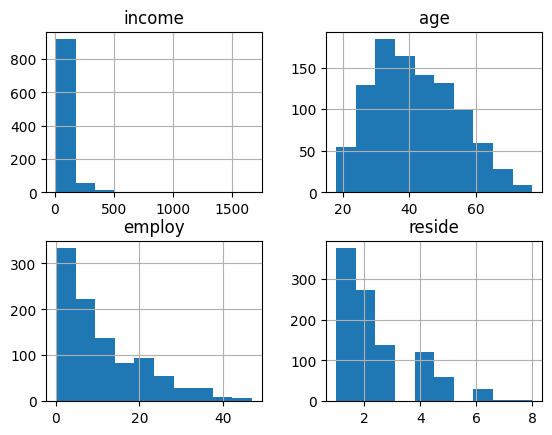

In [4]:
import matplotlib.pyplot as plt

viz = df[['income', 'age', 'employ', 'reside']]
viz.hist()
plt.show()

In [6]:
X=df.drop('custcat',axis=1)
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [7]:
y=df['custcat']
y.head

<bound method NDFrame.head of 0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64>

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

Creacion y Entrenamiento del modelo K-vecinos

In [11]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
import joblib
joblib.dump(classifier, 'knn_model.pkl')

classifier_loaded=joblib.load('knn_model.pkl')

In [13]:
y_pred=classifier_loaded.predict(X_test)
y_pred

array([3, 1, 2, 3, 4, 1, 1, 4, 1, 3, 4, 3, 2, 3, 4, 1, 2, 1, 1, 1, 1, 1,
       3, 2, 1, 3, 2, 1, 2, 1, 1, 3, 2, 3, 2, 1, 3, 3, 3, 3, 3, 2, 1, 3,
       2, 1, 4, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 4, 2, 2,
       3, 2, 1, 1, 3, 4, 3, 2, 2, 1, 2, 3, 2, 1, 3, 3, 2, 2, 3, 3, 2, 2,
       1, 3, 1, 1, 1, 3, 4, 3, 1, 1, 3, 3, 1, 2, 4, 1, 1, 3, 3, 1, 4, 1,
       4, 4, 3, 2, 2, 4, 3, 1, 2, 1, 1, 3, 1, 3, 3, 3, 2, 1, 1, 4, 1, 4,
       3, 2, 1, 2, 1, 1, 4, 1, 3, 1, 1, 2, 2, 2, 4, 2, 2, 4, 2, 1, 3, 3,
       2, 1, 1, 3, 1, 2, 2, 2, 2, 4, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2,
       3, 2, 3, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 3, 1, 2, 2, 1, 1, 1, 3, 3,
       4, 4])

Accuracy

In [ ]:


from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test, y_pred)
print("Precision del modelo", acc)


Precision del modelo 0.33


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.45      0.53      0.49        62
           2       0.29      0.40      0.34        40
           3       0.29      0.28      0.29        53
           4       0.10      0.04      0.06        45

    accuracy                           0.33       200
   macro avg       0.28      0.31      0.29       200
weighted avg       0.30      0.33      0.31       200



In [ ]:
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1, Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test) / np.sqrt(yhat.shape[0])
    
mean_acc

array([0.305, 0.3  , 0.28 , 0.28 , 0.33 , 0.31 , 0.29 , 0.295, 0.34 ])

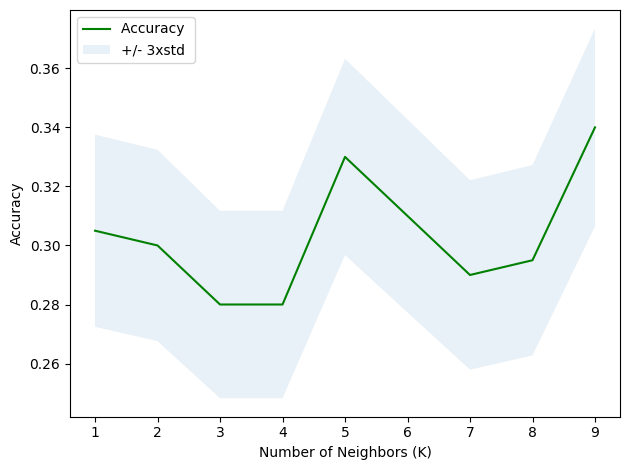

In [19]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1*std_acc,mean_acc + 1*std_acc, alpha=0.1)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


La mejor Acurracy ocurrio con k=9 como se ve en el grafico con una prediccion de 0.33

